In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.1 MB/s eta 0:00:00


In [ ]:
#@title Insert Minimum, Maximum and required number of intervals of the file
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ipywidgets as widgets
from IPython.display import display

interval_breaks = []
B_points = []
# Create a dictionary to store the values
input_values = {}

def submit(button):
    min_value = min_entry.value
    max_value = max_entry.value
    num_intervals = num_entry.value
    B_points = []

    if not min_value:
        min_value = 0  # Default value if min_value is not provided

    if not max_value:
        max_value = 0  # Default value if max_value is not provided

    try:
        min_value = float(min_value)
        max_value = float(max_value)

        if num_intervals:
            num_intervals = int(num_intervals)
        else:
            num_intervals = 10  # Default value if num_intervals is not provided

        if num_intervals < 0:
            result_label.value = "Invalid input! num_intervals cannot be negative."
        else:
            # Store the values in the dictionary
            input_values['min_value'] = min_value
            input_values['max_value'] = max_value
            input_values['num_intervals'] = num_intervals

            if min_value == 0 and max_value == 0:
                result_label.value = "min_value: 0, max_value: 0, num_intervals: {}".format(num_intervals)
            else:
                result_label.value = "min_value: {}, max_value: {}, num_intervals: {}".format(min_value, max_value, num_intervals)
    except ValueError:
        result_label.value = "Invalid input!"



# Create input fields for the float values
min_entry = widgets.FloatText(description="Min value:")
max_entry = widgets.FloatText(description="Max value:")
num_entry = widgets.IntText(description="Num intervals:")
display(min_entry, max_entry, num_entry)

# Create a submit button
submit_button = widgets.Button(description="Submit")
display(submit_button)

# Create a label to display the result
result_label = widgets.Label()
display(result_label)

# Assign the submit function to the button click event
submit_button.on_click(submit)


FloatText(value=0.0, description='Min value:')

FloatText(value=0.0, description='Max value:')

IntText(value=0, description='Num intervals:')

Button(description='Submit', style=ButtonStyle())

Label(value='')

In [ ]:
#@title Insert the color palette
# ET = ["#ffff73", "#e0ff73", "#bef74d", "#98e600", "#63c84b", "#3eae82", "#2a98a3", "#2a769c", "#265392", "#1f2e83"]
ET = ["#F2F2F2", "#F0C9C0", "#EDB48E", "#EBB25E", "#E8C32E", "#E6E600", "#A0D600", "#63C600", "#2DB600", "#00A600"]
# Precipitation = ["#f7f584", "#fcfa4f", "#fee323", "#ffaf00", "#fd3c2e", "#f20265", "#de00a4", "#b30bcf", "#8314d8", "#4e1cbf"]
Precipitation = ["#FFFFD9","#EDF8B1","#C7E9B4","#7FCDBB", "#41B6C4", "#1D91C0", "#225EA8", "#253494", "#081D58" ]
# SRO = ["#d6d6d6", "#cadfeb", "#bee8ff", "#5facff", "#0070ff", "#005fd4", "#004da8"]
SRO = ["#A50026", "#D73027", "#F46D43", "#FDAE61", "#FEE090", "#FFFFBF", "#E0F3F8", "#ABD9E9", "#74ADD1", "#4575B4", "#313695" ]
# SRO = ["#543005", "#8C510A", "#BF812D", "#DFC27D", "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", "#35978F", "#01665E", "#003C30" ]
Water_Yield = ["#ff0000","#ff7100","#ffc600","#ffff00","#e4e48f","#9fd3e3","#30cdfc","#10b5ed","#008ad1","#004da8"]
Evaporation = [13, 14, 15, 16]
Transpiration = [17, 18]

options = [
    ("ET", ET),
    ("Precipitation", Precipitation),
    ("SRO", SRO),
    ("Water_Yield", Water_Yield),
    ("Evaporation", Evaporation),
    ("Transpiration", Transpiration)
]

option_widg = widgets.Dropdown(
    options=options,
    description="Select an option:"
)

display(option_widg)


Dropdown(description='Select an option:', options=(('ET', ['#F2F2F2', '#F0C9C0', '#EDB48E', '#EBB25E', '#E8C32…

In [ ]:
# !pip install seaborn

import seaborn as sns

# Specify the number of colors you want (e.g., 11)
num_colors = 10

# Get the hex color palette
color_palette = sns.color_palette('YlGnBu', num_colors).as_hex()

# Print the array of colors
print(color_palette)


['#f2fabc', '#dcf1b2', '#bbe4b5', '#85cfba', '#57bec1', '#34a9c3', '#1d8dbe', '#2166ac', '#24479d', '#1d2e83']


In [ ]:
#@title Insert interval breaks (if manual interval insertion is required)
Enter_the_break_points_values = '400,500,600,700,800,900,1000,1100,1200,1400' #@param {type:"string"}
# input_str = input("Enter the array values: ")
input_list = Enter_the_break_points_values.split(",")  # Split the string at commas

# Check if the input list is empty
if input_list == ['']:
    B_points = []  # Assign an empty list
else:
    B_points = [float(num) for num in input_list]  # Convert substrings to floats

print(B_points)



[400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1400.0]


[600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0]


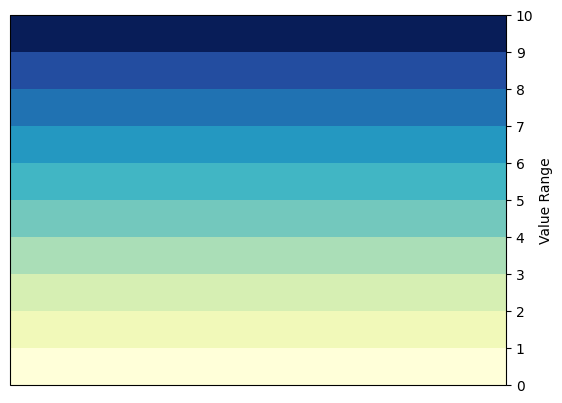

Text file created successfully.


In [ ]:
#@title Setting up a text file and breakpoints for the QGIS
variable = option_widg.value

# Assign B_points value to another variable
interval_breaks = B_points

# Print the value of other_variable
# print(B_points)

# print(variable)
# Access the variable values from the dictionary
min_value = input_values.get('min_value')
max_value = input_values.get('max_value')
num_intervals = input_values.get('num_intervals')
interval_breaks = B_points
# print("Min value:", min_value)
# print("Max value:", max_value)
# print("Num intervals:", num_intervals)

hex_colors = variable
def generate_values(lower_limit, upper_limit):
    num1 = upper_limit - lower_limit
    num2 = np.ceil(num1 / 100)
    # print(num2)

    if num2 >= 1 and num2 < 12:
        num_values = int(num2)
    elif num2 >= 15 and num2 < 25:
        num_values = int(num2/2)
    elif num2 >= 25 and num2 < 35:
        num_values = int(num2/3)
    else:
        num_values = 10

    desired_gap = (upper_limit - lower_limit) / (num_values)
    desired_gap = np.ceil(desired_gap / 100 )* 100
    result = []

    current_value = (np.ceil(lower_limit / 100) * 100)


    for i in range(num_values-1):
        current_value += desired_gap

        rounded_value = np.floor(current_value / 100) * 100

        if rounded_value >= upper_limit:
            break
        current_value = rounded_value


        result.append(int(rounded_value))
#         print(result)
    return result

def generate_values_1(lower_limit, upper_limit, num_values):
    num1 = upper_limit - lower_limit
#     print(num_values)
    desired_gap = ((upper_limit - lower_limit) / (num_values))
    desired_gap = np.floor(desired_gap / 100) * 100
    if desired_gap ==0:
        desired_gap =100
    # print(desired_gap)
    result = []

    current_value = (np.floor(lower_limit / 100) * 100)
#     print(current_value)

    for i in range(num_values-1):
        current_value += desired_gap

        rounded_value = np.floor(current_value / 100) * 100

        if rounded_value >= upper_limit:
            break
        current_value = rounded_value
        result.append(int(rounded_value))

    if (upper_limit - result[-1]) > desired_gap:
      var1 = (upper_limit - result[-1])/2
      var2 = var1
      var3 = np.floor(var2/ 100) * 100
      for i in range(num_values-1):
        result[i] = result[i]+var3

    # print(result)
    return result

def hex_to_rgb(hex_code):
    return mcolors.hex2color(hex_code)

def rgb_to_hex(rgb_color):
    return mcolors.rgb2hex(rgb_color)

def stretch_color_palette(color_palette, num_colors):
    color_palette = np.array(color_palette)
    old_indices = np.linspace(0, len(color_palette) - 1, num=len(color_palette))
    new_indices = np.linspace(0, len(color_palette) - 1, num=num_colors)
    stretched_palette = np.zeros((num_colors, color_palette.shape[1]))

    for i in range(color_palette.shape[1]):
        stretched_palette[:, i] = np.interp(new_indices, old_indices, color_palette[:, i])

    return stretched_palette.tolist()

def create_txt_file(min_value, max_value, interval_breaks, hex_colors):

    if interval_breaks:
        interval_breaks = sorted(interval_breaks)
        interval_breaks = [min_value] + interval_breaks + [max_value]
        num_intervals = len(interval_breaks) - 1
    else:
        interval_size = (max_value - min_value) / num_intervals
        interval_breaks = [min_value + i * interval_size for i in range(num_intervals)]
        interval_breaks.append(max_value)

    color_ranges = []

    # Stretch the hex color palette to the desired number of intervals
    num_colors = num_intervals + 1
    rgb_palette = [hex_to_rgb(hex_color) for hex_color in hex_colors]
    stretched_palette = stretch_color_palette(rgb_palette, num_colors)

    # Generate color ranges with defined value ranges
    for i in range(num_intervals):
        value_range_start = interval_breaks[i]
        value_range_end = interval_breaks[i + 1]
        rgb = stretched_palette[i]
        color_ranges.append((rgb, value_range_start, value_range_end))

    # Create color palette plot
    fig, ax = plt.subplots()
    cmap = mcolors.ListedColormap(stretched_palette)
    bounds = list(range(num_intervals + 1))
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Set an empty array to ensure correct scaling
    cb = plt.colorbar(sm, cax=ax, boundaries=bounds, ticks=range(num_intervals + 1))
    cb.set_label('Value Range')
    plt.show()

    # Write the color ranges to the text file
    with open("color_ranges_discrete.txt", "w") as txt_file:
        txt_file.write("# QGIS Generated Color Map Export File\n")
        txt_file.write("INTERPOLATION:DISCRETE\n")
        for i, (rgb, value_range_start, value_range_end) in enumerate(color_ranges):
            r, g, b = [int(c * 255) for c in rgb]
            if i == num_intervals - 1:
                txt_file.write("{:.9f},{},{},{},{},{:.9f} - {:.9f}\n".format(value_range_start, r, g, b, 255, value_range_start, max_value))
            else:
                txt_file.write("{:.9f},{},{},{},{},{:.9f} - {:.9f}\n".format(value_range_start, r, g, b, 255, value_range_start, value_range_end))

    print("Text file created successfully.")
# Set the minimum and maximum values, the interval break points (optional), number of intervals (optional), and the hex color palette
# min_value = 333
# max_value = 1561.10742
# # interval_breaks = [400,500,600,700,800,900,1000,1100,1200,1300,1400]  # Specify the interval break points (if available)
# num_intervals = 30  # Specify the number of intervals (if interval break points are not provided)
# hex_colors = ["#9E5100", "#D38220", "#EAC479", "#FBE9C2", "#F5F5F5", "#D9F3F9", "#96DAEB", "#50AED4", "#1676B8"]

# print(num_intervals)
# def choose(min_value, max_value,interval_breaks=[]):

#     if len(interval_breaks) != 0:
#         interval_breaks = interval_breaks

#     else:
#         try:
#                 if len(interval_breaks) == 0:
#                     interval_breaks = generate_values_1(min_value, max_value, num_intervals)
#         except NameError:
#             interval_breaks = generate_values(min_value, max_value)

#     print(interval_breaks)
#     return interval_breaks
def choose(min_value, max_value, interval_breaks=[]):
    if len(interval_breaks) != 0:
        # interval_breaks is provided as input, use it directly
        generated_breaks = interval_breaks
    else:
        try:
            # interval_breaks is not provided, generate it using generate_values_1
            generated_breaks = generate_values_1(min_value, max_value, num_intervals)
        except NameError:
            # num_intervals is not defined, generate breaks using generate_values
            generated_breaks = generate_values(min_value, max_value)

    print(generated_breaks)
    return generated_breaks
# generated_breaks = generate_values_1(min_value, max_value, num_intervals)
# choose(min_value, max_value, interval_breaks)
# Create the text file with color ranges based on the values and hex color palette provided
create_txt_file(min_value, max_value, choose(min_value, max_value, interval_breaks), hex_colors)


[600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0]
[600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0]


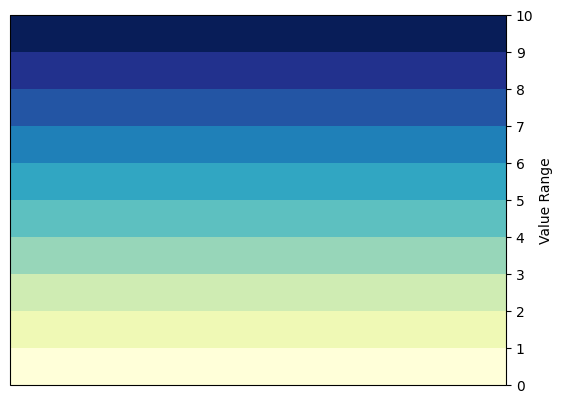

Hex Color Palette: ['#ffffd9', '#eff9b5', '#cfecb3', '#97d6b9', '#5dc0c0', '#31a6c2', '#1f80b8', '#2355a4', '#22318d', '#081d58']


In [ ]:
#@title To get Hex and Break points array
choose(min_value, max_value, interval_breaks=[])
def create_color_palette1(min_value, max_value, interval_breaks, hex_colors):
    if interval_breaks:
        interval_breaks = sorted(interval_breaks)
        interval_breaks = [min_value] + interval_breaks + [max_value]
        num_intervals = len(interval_breaks) - 1
    else:
        interval_size = (max_value - min_value) / num_intervals
        interval_breaks = [min_value + i * interval_size for i in range(num_intervals)]
        interval_breaks.append(max_value)

    color_ranges = []

    num_colors = num_intervals  # Update num_colors to match the number of intervals
    rgb_palette = [hex_to_rgb(hex_color) for hex_color in hex_colors]
    stretched_palette = stretch_color_palette(rgb_palette, num_colors)

    for i in range(num_intervals):
        value_range_start = interval_breaks[i]
        value_range_end = interval_breaks[i + 1]
        rgb = stretched_palette[i]
        color_ranges.append((rgb, value_range_start, value_range_end))

    fig, ax = plt.subplots()
    cmap = mcolors.ListedColormap(stretched_palette)
    bounds = list(range(num_intervals + 1))
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = plt.colorbar(sm, cax=ax, boundaries=bounds, ticks=range(num_intervals + 1))
    cb.set_label('Value Range')
    plt.show()

    color_palette_hex = [rgb_to_hex(rgb) for rgb in stretched_palette[:num_intervals]]  # Adjust the slicing to include only the desired number of colors

    return color_palette_hex, interval_breaks

hex_palette, breakpoints = create_color_palette1(min_value, max_value, choose(min_value, max_value, interval_breaks), hex_colors)
print("Hex Color Palette:", hex_palette)
# print("Breakpoints:",interval_breaks )

In [ ]:
import rasterio
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

image_path1 = '/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif'
tif_file1 = rasterio.open(image_path1)

data1 = tif_file1.read(1)  # Assuming it's a single-band TIF file

# Exclude NaN values
min_value1 = np.nanmin(data1)
max_value1 = np.nanmax(data1)

print("Minimum value:", min_value1)
print("Maximum value:", max_value1)



Mounted at /content/drive
Minimum value: 331.79544
Maximum value: 1561.1079


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]


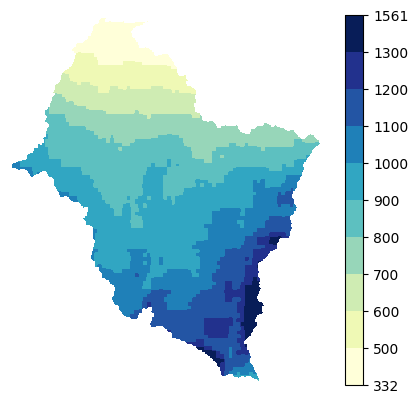

In [ ]:
#@title Matplotlib Map
# choose_array = np.array(choose(min_value, max_value, interval_breaks))
# print(type(choose_array[0]))
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from PIL import Image
import numpy as np
import rasterio
from google.colab import drive
drive.mount('/content/drive')

# Define your custom color palette
color_palette = hex_palette  # Blue, Green, Red

# Load the TIFF image
image = Image.open('/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif')
array = np.array(image)

image_path1 = '/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif'
tif_file1 = rasterio.open(image_path1)

data1 = tif_file1.read(1)  # Assuming it's a single-band TIF file

# Exclude NaN values
min_value1 = np.nanmin(data1)
max_value1 = np.nanmax(data1)
choose_array = np.array(choose(min_value1, max_value1, interval_breaks))
# print("Minimum value:", min_value1)
# print("Maximum value:", max_value1)
# # print(min_value1)
# print(max_value1)
# Set NaN values to transparent
array[np.isnan(array)] = np.nan

# Define the value range for the TIFF file
# min_value = 200  # Minimum value of the range
# max_value = 1500  # Maximum value of the range
min_value = input_values.get('min_value')
max_value = input_values.get('max_value')
choose_array = np.array(choose_array, dtype=np.float64)
# choose_array = choose.astype(np.float64)
# Define the custom interval breaks
# break_points = [min_value] + choose + [max_value]
choose_with_limits = np.insert(choose_array, 0, min_value1)
break_points = np.append(choose_with_limits, max_value1)
 # Manually defined interval break points including min and max values

# Exclude the min and max values from the interval breaks
# break_points = [bp for bp in break_points if min_value < bp < max_value]

# Create a colormap based on the custom color palette
cmap = ListedColormap(color_palette)


# Normalize the data within the specified value range
norm = BoundaryNorm(break_points, len(color_palette))

# Display the image with the custom colormap and value range
plt.imshow(array, cmap=cmap, norm=norm)
plt.axis('off')
plt.colorbar(ticks=break_points)
plt.savefig('P_volta_equal_interval.jpg', format='jpeg')
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter an integer: 100
You entered: 100


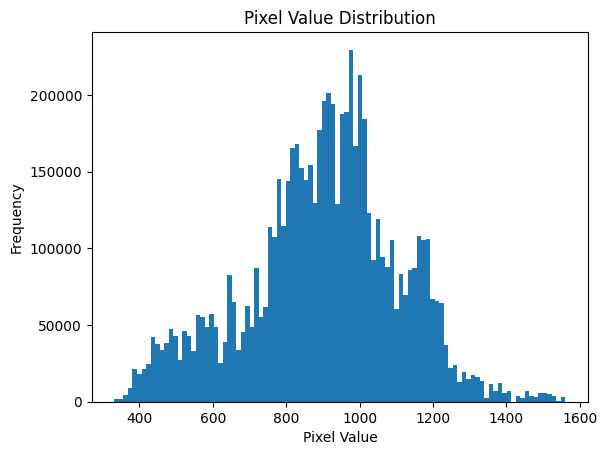

Number of non-NaN values: 6764119


In [ ]:
#@title Histogram
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

# Prompt the user for input
integer_input = int(input("Enter an integer: "))
print("You entered:", integer_input)

# Load the TIF file using scikit-image
image = io.imread('/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif')

# Flatten the image and remove NaN values
image_flat = image.flatten()
image_flat = image_flat[~np.isnan(image_flat)]

# Get the minimum and maximum values of the image
min_value = np.min(image_flat)
max_value = np.max(image_flat)

# Plot the pixel value distribution
plt.figure()
plt.hist(image_flat, bins= integer_input, range=[min_value, max_value])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution')
plt.show()

# Get the number of non-NaN values
num_non_nan = np.count_nonzero(~np.isnan(image))
print("Number of non-NaN values:", num_non_nan)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


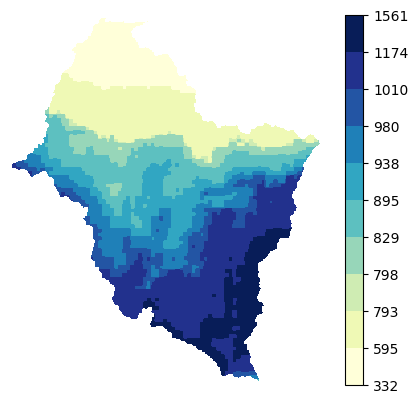

In [ ]:
#@title Matplotlib Map - Dividing Classes According to the Frequency
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.colors import ListedColormap, BoundaryNorm
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

# Load the TIF file using scikit-image
image = io.imread('/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif')

# Flatten the image and remove NaN values
image_flat = image.flatten()
image_flat = image_flat[~np.isnan(image_flat)]

# Get the minimum and maximum values of the image
min_value = np.min(image_flat)
max_value = np.max(image_flat)

# User-defined number of regions
num_regions = input_values.get('num_intervals')

# Calculate the value range for each region
region_ranges = []
region_size = len(image_flat) // num_regions
remainder = len(image_flat) % num_regions
current_index = 0

for i in range(num_regions - 1):
    region_size_i = region_size + (1 if i < remainder else 0)
    region_end_index = current_index + region_size_i - 1
    region_ranges.append(image_flat[region_end_index])
    current_index = region_end_index + 1

# Last region ends with the maximum value
region_ranges.append(max_value)

# Convert the breaking points to a numpy array (excluding the last element)
breaking_points = np.array(region_ranges[:-1])

# Round the values in the breaking points array to the nearest integer
rounded_breaking_points = np.round(breaking_points)
# rounded_breaking_points = np.ceil(rounded_breaking_points / 10)*10
# Define your custom color palette
color_palette = hex_palette  # Blue, Green, Red

# Load the TIFF image
image = Image.open('/content/drive/MyDrive/Volta/Volta_P_MSWEP_avg.tif')
array = np.array(image)

# Set NaN values to transparent
array[np.isnan(array)] = np.nan

# Define the custom interval breaks
choose_with_limits = np.insert(rounded_breaking_points, 0, min_value)
break_points = np.append(choose_with_limits, max_value)

# Sort the interval breaks in ascending order
break_points = np.sort(break_points)

# Create a colormap based on the custom color palette
cmap = ListedColormap(color_palette)

# Normalize the data within the specified value range
norm = BoundaryNorm(break_points, len(color_palette))

# Display the image with the custom colormap and value range
plt.imshow(array, cmap=cmap, norm=norm)
plt.axis('off')
plt.colorbar(ticks=break_points)
plt.savefig('P_volta_Frequency.jpg', format='jpeg')
plt.show()

# import numpy as np

# # Define the range labels for each class
# range_labels = []
# for i in range(len(breaking_points)-1):
#     start_value = breaking_points[i]
#     end_value = breaking_points[i + 1]
#     range_label = f"{start_value:.6f} - {end_value:.6f}"
#     range_labels.append(range_label)

# # Define the color values for each class

# # Define the hexadecimal color palette
# # Convert hexadecimal color codes to RGB color values
# color_values = []
# for hex_code in hex_palette:
#     # Remove the '#' symbol from the hexadecimal code
#     hex_code = hex_code.lstrip('#')
#     # Convert the hexadecimal code to RGB values
#     rgb = tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))
#     # Append the RGB values to the color_values list
#     color_values.append(','.join(str(c) for c in rgb))

# # Create the content of the text file
# content = ""
# for i in range(len(range_labels)):
#     start_value = breaking_points[i]
#     end_value = breaking_points[i + 1]
#     color_value = color_values[i]
#     line = f"{start_value:.9f},{color_value},{end_value:.9f} - {start_value:.9f} - {end_value:.9f}"
#     if i < len(range_labels) - 1:
#         line += f" - {range_labels[i]}"
#     content += line + "\n"

# # Add the last line with the maximum value range
# max_value = breaking_points[-1]
# last_line = f"{max_value:.9f},{color_values[-1]},{max_value:.9f} - {max_value + 145:.9f}"
# content += last_line

# # Save the content to a text file
# file_path = 'color_map.txt'
# with open(file_path, 'w') as file:
#     file.write("# QGIS Generated Color Map Export File\n")
#     file.write("INTERPOLATION:DISCRETE\n")
#     file.write(content)

# print("Color map file saved successfully.")



